# 1. 数据预处理

## 1.1 导入包

In [1]:
# -*- coding: utf-8 -*-
"""
Python 3.7.7
sklearn 0.23.1
使用 包装法-递归特征消除法 对糖尿病数据集降维
递归特征消除法是常用的包装法
"""

# 导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression

## 1.2 导入数据集

In [2]:
# 导入数据集
dataset = pd.read_csv('pima-indians-diabetes.csv')
print(dataset.shape)

(768, 9)


#### 数据集有768行，9列。有8个自变量，1个因变量。

## 1.3 检测缺失值

In [3]:
# 检测缺失值
null_df = dataset.isnull().sum()

## 1.4 生成自变量和因变量

In [4]:
# 生成自变量和因变量
X = dataset.iloc[:,0:8].values
y = dataset.iloc[:,8].values

## 1.5 拆分训练集和测试集

In [5]:
# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## 1.6 特征缩放

In [6]:
# 特征缩放
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# 2. 使用递归特征消除法降维

In [7]:
# 建立逻辑回归模型
model = LogisticRegression()
rfecv = RFECV(estimator = model, min_features_to_select = 1, cv=5, verbose=1, step=1, scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator wi

# 3. 画出字段个数 VS 交叉验证分数

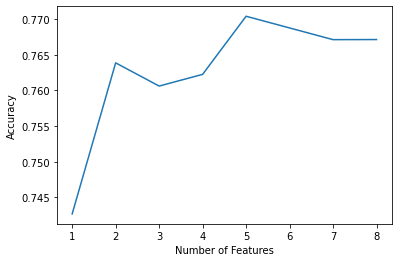

In [8]:
# 画出字段个数 VS 交叉验证分数
plt.figure()
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

# 4. 打印其它降维后的信息

In [9]:
# 打印其它降维后的信息
print("选择的字段个数：%d" % rfecv.n_features_) # 5
print("选择的字段索引是：%s" % rfecv.support_) # [ True  True  True False False  True  True False]
print("字段排名是：%s" % rfecv.ranking_) # [1 1 1 4 3 1 1 2]

选择的字段个数：5
选择的字段索引是：[ True  True  True False False  True  True False]
字段排名是：[1 1 1 4 3 1 1 2]


# 5. 得到降维后的自变量

In [10]:
# 得到降维后的自变量
X_selected = X[:, [0,1,2,5,6]]
print(X_selected)

[[  6.    148.     72.     33.6     0.627]
 [  1.     85.     66.     26.6     0.351]
 [  8.    183.     64.     23.3     0.672]
 ...
 [  5.    121.     72.     26.2     0.245]
 [  1.    126.     60.     30.1     0.349]
 [  1.     93.     70.     30.4     0.315]]


#### X_selected 存储着降维后的自变量。降维后自变量有5个字段。